<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/3.%20Image%20Processing/3_ImageProcessing_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Image Processing (Thresholding)

In digital image processing, thresholding is the simplest method of segmenting images. From a grayscale image, thresholding can be used to create binary images.

 - Thresholding will convert an image to consist of  only two values, white or black
 - Basically we take color picture --> convert to gray scale --> apply threshold

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

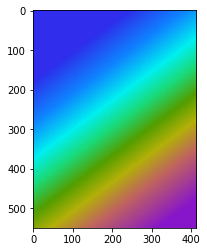

In [2]:
img = cv2.imread('rainbow.jpg')
plt.imshow(img)

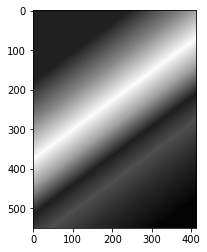

In [3]:
#to read in grayscale just directly add 0
img = cv2.imread('rainbow.jpg',0)
plt.imshow(img,cmap='gray')

##### Simple Thresholding functions

There are basic simple thresholding functions:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

![alt text](https://drive.google.com/uc?id=1xXsTkoLyRGExY0G7rmbdpoPj5sCIfwxI)


In [4]:
ret1, thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 
#threshold = 127 as near to half of 255 pixel #can check from img.max()
#any value below 127 will be 0 and above 127 will be 255

In [5]:
ret1 #cutoffvalue

127.0

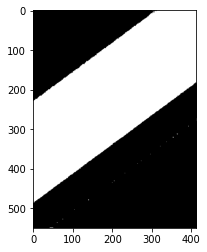

In [6]:
plt.imshow(thresh1,cmap='gray')

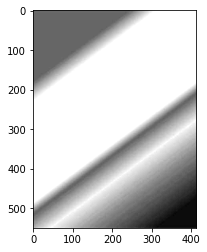

In [7]:
#we can use BINARY_INV to inverse the limits
#THRESH_TRUNC - if over threshold we go to whatever we set it else keep orginal value

img2 = cv2.imread('rainbow.jpg',0)
ret1, thresh1 = cv2.threshold(img2,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh1,cmap='gray') 

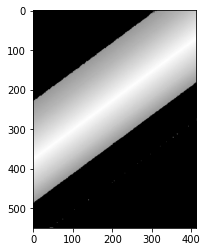

In [8]:
img3 = cv2.imread('rainbow.jpg',0)
ret1, thresh1 = cv2.threshold(img3,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh1,cmap='gray') 

##### On Real world application

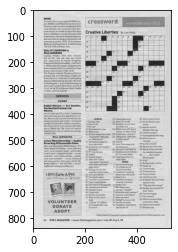

In [9]:
img_r = cv2.imread('crossword.jpg',0)
plt.imshow(img_r,cmap='gray')

In [10]:
def show_pic(img):
  fig = plt.figure(figsize=(15,15))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

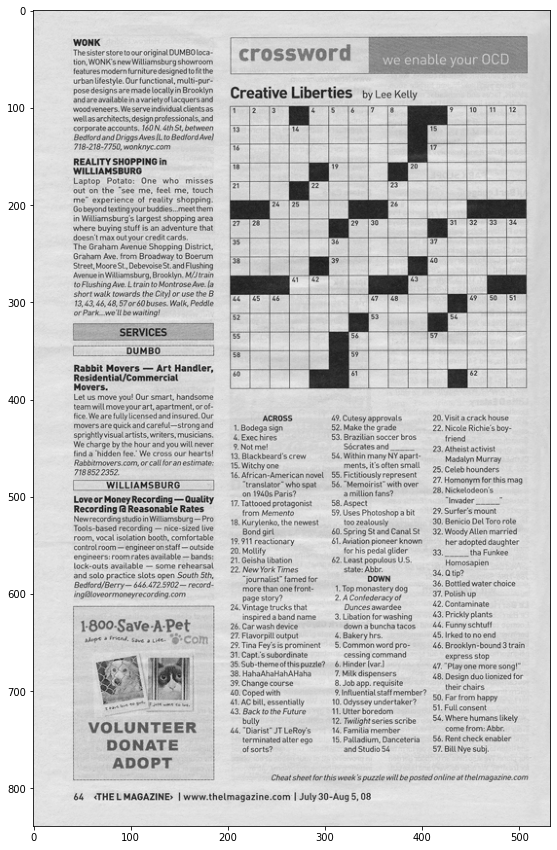

In [11]:
show_pic(img_r)

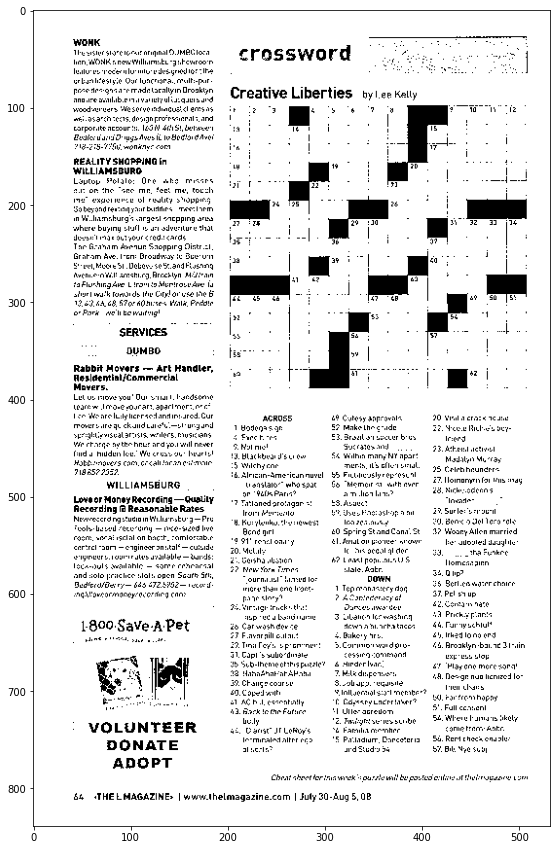

In [13]:
# so we differentiate the color in this image and say where there is ink should be black and else where it should be white

ret,th1 = cv2.threshold(img_r,127,255,cv2.THRESH_BINARY)
show_pic(th1)

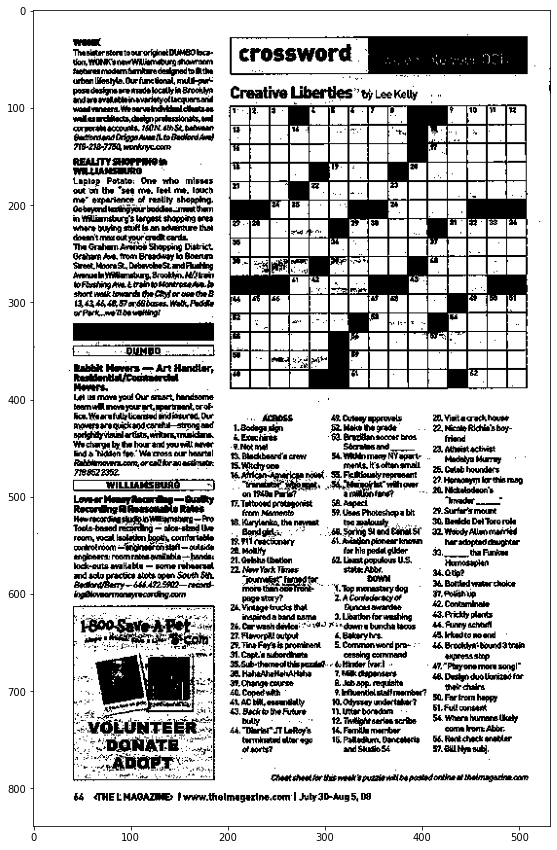

In [14]:
#there is a lot problems in above picture as there is a lot noise

#LETS SEE WITH HIGHER THRESHOLD

ret,th1 = cv2.threshold(img_r,200,255,cv2.THRESH_BINARY)
show_pic(th1)

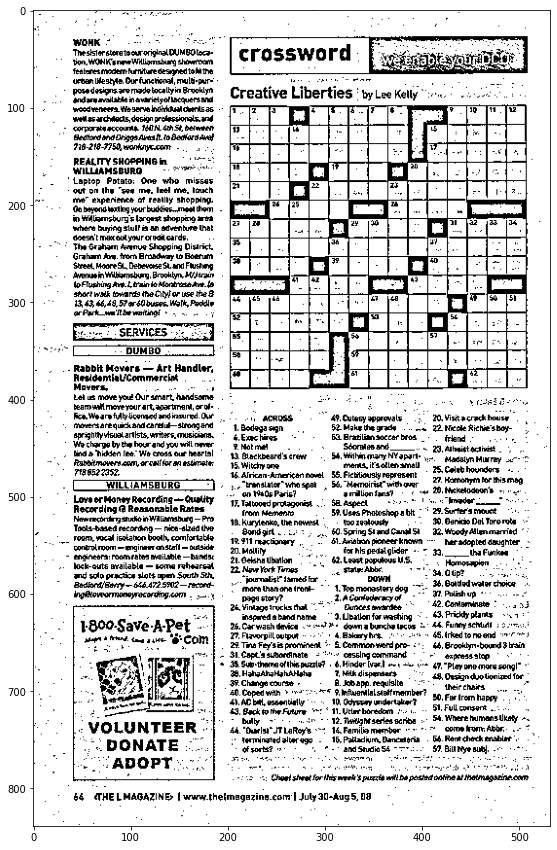

In [15]:
# that's a lot of threshold chosen but we can trail and run at different threshold
# or we can set threshold based off the pizel and where it is great around pixel

#adaptive threshold
# adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
# blocksize is pizel size of the neighbourhood that is used to calculate a threshold for a particular pixel (odd NUMBER) =11
# c is constant that is subtracted from mean or gaussian mean, mostly it is +ve, it can be 0 or -ve = 8
th2 = cv2.adaptiveThreshold(img_r,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,
                            11,8)
show_pic(th2)

Here we see it gives better image as compared to simple threshold but it didn't fill the boxes in the crossword. So here we can use blending to fill these boxes with different thresholds

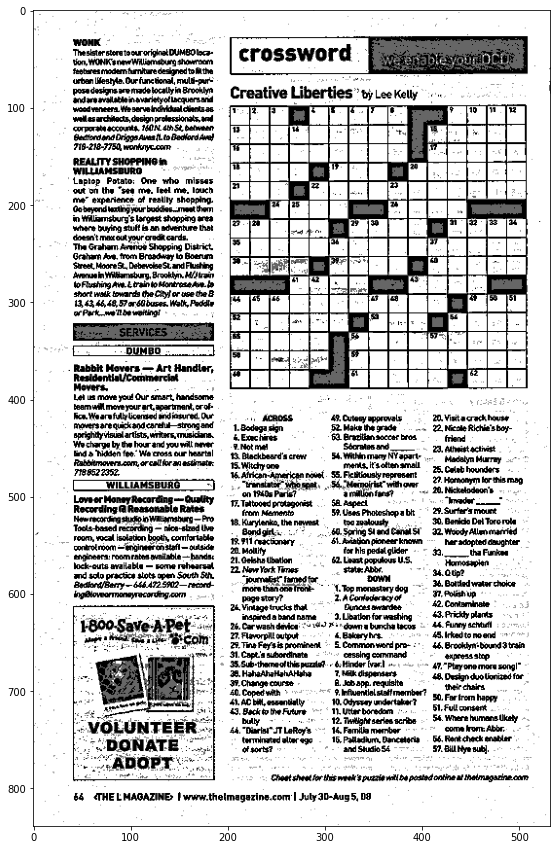

In [16]:
blended = cv2.addWeighted(src1=th1,alpha=0.6,
                          src2=th2,beta=0.4,gamma=0)
show_pic(blended)

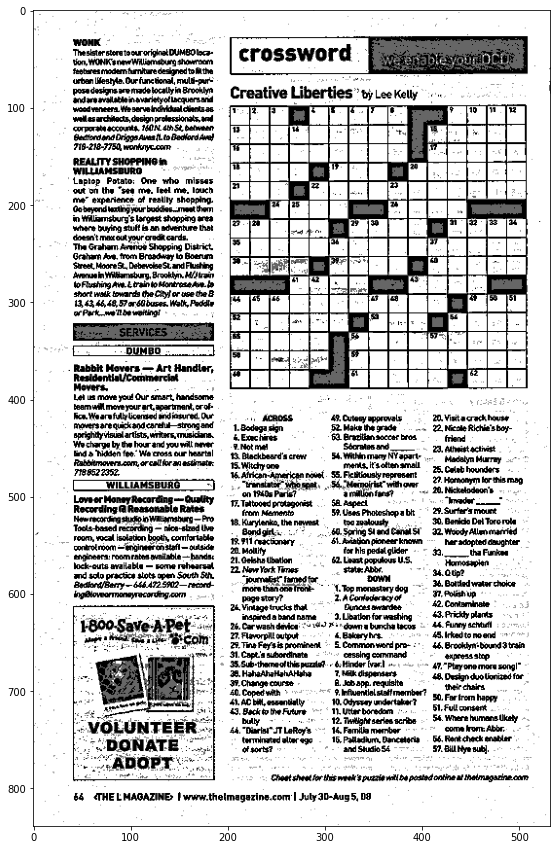

In [17]:
# Now let us try to check with gaussian

th3 = cv2.adaptiveThreshold(img_r,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,
                            11,8)
blended = cv2.addWeighted(src1=th1,alpha=0.6,
                          src2=th3,beta=0.4,gamma=0)
show_pic(blended)